# Разбор задач AtCoder Beginner Contest 268

## Задача С

### Условие задачи:

У нас есть круговой стол, поделенный на $N$ равных секторов. За столом сидят люди, пронумерованные от $0$ до $(N - 1)$ включительно. Перед человеком с номером $i$ стоит блюдо $p_i$. Мы можем поворачивать стол против часовой стрелки **$0$ или более количество раз**. Человек с номером $i$ считается счастливым, если блюдо с номером $i$ стоит **перед ним или его соседеми**. Более формально, если блюдо с номером $i$ перед человеком с номером $(i - 1) \mod N$, $i$ или $(i + 1) \mod N$.  
   
**Вопрос: Какой максимальное количество людей может быть счастливыми для заданного $p$?**  
#### Пример:

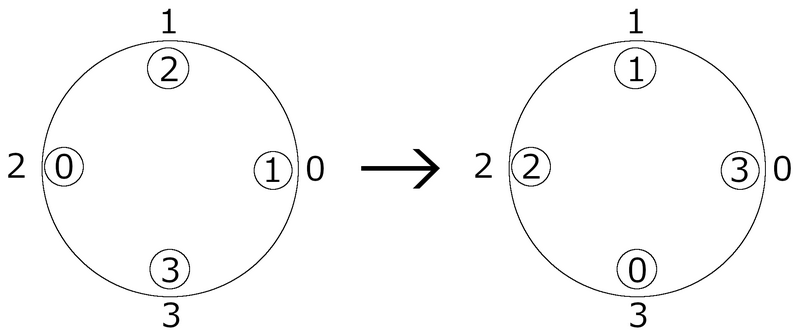

## Идея:

**Во-первых**, для упрощения вопросприятия **будем поворачивать стол по часовой стрелке**, от этого ответ не поменяется. Любой возможный вариант расстановки можно получить и тем, и другим способом, а у нас не стоит задача узнать минимальное количество поворотов.

Самым очевидным решением является **поворот стола на один сектор и проверка всех на счастливость** и так $N$ раз. В итоге получаем сложность $O(N^2)$, что при ограничениях $N <= 2 \times 10^5$ недопустимо.

Почему бы нам просто не посчитать для каждого блюда, какое количество поворотов удовлетворит соответствующего ему человека, а потом выбрать самый популярный вариант?  
Если рассмотреть наш пример, то:  
> Для **нулевого блюда** приемлимыми будут повороты на $1, 2, 3$ поворота по часовой стрелке;  
> Для **первого блюда** приемлимыми будут повороты на $0, 2, 3$ поворота по часовой стрелке;  
> Для **второго блюда** приемлимыми будут повороты на $0, 2, 3$ поворота по часовой стрелке;  
> Для **третьего блюда** приемлимыми будут повороты на $0, 1, 3$ поворота по часовой стрелке;  

**ИТОГО:** для всех людей приемлемым является поворот на $3$ сектора по часовой стрелке.

**Вопрос:** Как за $O(1)$ проверить, какие повороты для человека под номером $i$ будут **удовлетворительны**?  
**Ответ:** Сначала запишем индексы, куда **данное блюдо может попасть**. В нашем примере, для **второго** блюда будут допустимыми индексы $1, 2, 3$. Далее, пройдемся по этим индексам. Обозначим **текущий** индекс как $i$, а **допустимый** как $j$.  
> Если $i <= j$, тогда нам нужно сдвинуть стол на $(j - i)$ секторов вправо.  
> Иначе, нужно сдвинуть стол на $(N - i + j)$ секторов вправо.  

Также, нужно завести массив на $N$ элементов, в котором в индексе $i$ будет хранится **количество человек, для которых поворот на $i$ секторов является допустимым**. И потом заполнять его по примеру, описанному выше.

## Код:

In [ ]:
n = int(input())
p = list(map(int, input().split()))
a = [0] * n # a[i] = кол-во человек, для которых поворот на i секторов допустим
for i in range(n):
    tmp = [p[i] - 1, p[i], (p[i] + 1) % n] # список допустимых индексов
    if tmp[0] == -1: # если индекс отрицательный
        tmp[0] = n - 1 # заменяем его на последний элемент
    for j in tmp:
        if j >= i: # если допустимый индекс справа от текущего
            a[j - i] += 1
        else: # если допустимый индекс слева от текущего
            a[n - i + j] += 1
ans = 0
for i in a: # находим самое популярное количество поворотов
    ans = max(ans, i)
print(ans)